# Group 5 - Final Report
### Noelani Roy, Yihong Qiu, Cosimo Cambi, Craig Perkins

In [1]:
#Libraries Imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
df=pd.read_csv(
    #'C:/Users/Noela_tm/6000/eai6000_group5/Data/df_cat.csv')
    'df_cat.csv')

#set to a sample of .xx to get all of the code working correctly, change to 1 for actuall run
fraud_df = df.sample(frac=1,random_state=12)

In [3]:
fraud_df.drop([
    'cc_num',
    'merchant',
    'category',
    #'amt',
    'last',
    #'city_pop',
    'job',
    'date_of_birth',
    'year_of_birth',
    'gender',
    'txn_datetime',
    'txn_date',
    #'distance',
    'Target',
    #'age'
], axis=1, errors='ignore', inplace=True)
fraud_df.head()

,amt,city_pop,age,distance,hour,day,month,year,is_fraud,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
113679,86.43,2807,89,129.920535,11,5,3,2019,0,0,...,0,0,0,0,0,0,0,0,0,0
192166,199.10,15426,84,81.858081,22,8,4,2019,0,0,...,0,0,1,0,0,0,0,0,0,0
1489435,25.85,1261,48,72.269072,1,28,8,2020,0,0,...,0,0,0,0,1,0,0,0,0,1
910765,57.17,502,60,67.796687,5,29,12,2019,0,0,...,0,0,0,0,0,0,1,0,0,0
83743,2.14,5927,47,33.872436,22,18,2,2019,0,0,...,0,0,0,0,0,0,1,0,0,1


In [4]:
fraud_df.nunique()

amt                          60616
city_pop                       891
age                             82
distance                   1852394
hour                            24
day                             31
month                           12
year                             2
is_fraud                         2
category_food_dining             2
category_gas_transport           2
category_grocery_net             2
category_grocery_pos             2
category_health_fitness          2
category_home                    2
category_kids_pets               2
category_misc_net                2
category_misc_pos                2
category_personal_care           2
category_shopping_net            2
category_shopping_pos            2
category_travel                  2
gender_M                         2
dtype: int64

In [5]:
#Breaking it into two parts, separate the target variable from the other columns
X=fraud_df.drop('is_fraud',axis=1).copy()
X.head()

,amt,city_pop,age,distance,hour,day,month,year,category_food_dining,category_gas_transport,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
113679,86.43,2807,89,129.920535,11,5,3,2019,0,1,...,0,0,0,0,0,0,0,0,0,0
192166,199.10,15426,84,81.858081,22,8,4,2019,0,0,...,0,0,1,0,0,0,0,0,0,0
1489435,25.85,1261,48,72.269072,1,28,8,2020,0,0,...,0,0,0,0,1,0,0,0,0,1
910765,57.17,502,60,67.796687,5,29,12,2019,0,0,...,0,0,0,0,0,0,1,0,0,0
83743,2.14,5927,47,33.872436,22,18,2,2019,0,0,...,0,0,0,0,0,0,1,0,0,1


In [6]:
y=fraud_df['is_fraud'].copy()
y.head()

113679     0
192166     0
1489435    0
910765     0
83743      0
Name: is_fraud, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25 , stratify=y)

In [8]:
print(X_train.shape)
print(X_test.shape)

(1389295, 22)
(463099, 22)


In [9]:
sum(y_train)/len(y_train)

0.005209836643765363

In [10]:
sum(y_test)/len(y_test)

0.005210548932301732

In [11]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 

Before Undersampling, counts of label '1': 7238
Before Undersampling, counts of label '0': 1382057 

After Undersampling, the shape of train_X: (14476, 22)
After Undersampling, the shape of train_y: (14476,) 

After Undersampling, counts of label '1': 7238
After Undersampling, counts of label '0': 7238


# Neural Network

### Scale the data sets

In [12]:
from sklearn.preprocessing import StandardScaler
#This creates scalars in order to scale the data so each variable is of similar size.
scaler  = StandardScaler()
scaler.fit(X_train_miss)

# transform our data matrices - this applies our scalar and scales the matrices for training and te stdata
X_train_tf = scaler.transform(X_train_miss)
X_test_tf = scaler.transform(X_test)

In [13]:
# TensorFlow and tf.keras #usin example on https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting as base
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


In [14]:
#Many models train better if you gradually reduce the learning rate during training. 
#Use optimizers.schedules to reduce the learning rate over time:

n_train = len(X_train_miss)
batch_size = 500
steps_per_epoch = n_train//batch_size

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(0.001,decay_steps=steps_per_epoch*1000,
                                                             decay_rate=1,staircase=False)
def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

#The code above sets a schedules.InverseTimeDecay to hyperbolically decrease the learning rate to 1/2 
#of the base rate at 5000 epochs, 1/3 at 10000 epochs and so on.

In [15]:
#To reduce the logging noise use the tfdocs.EpochDots which simply prints a . for each epoch,
#and a full set of metrics every 100 epochs.

#Next include callbacks.EarlyStopping to avoid long and unnecessary training times. 
#Note that this callback is set to monitor the val_binary_crossentropy, not the val_loss.
def get_callbacks(name):
    return [
    tfdocs.modeling.EpochDots(report_every=500),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=250),
    #tf.keras.callbacks.TensorBoard(logdir/name),
    ]


In [16]:
#Each Model will be compiled and fit in one step. 
def compile_and_fit(model, name, optimizer=None, max_epochs=5000):
    #Compile The Model
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=[tf.keras.losses.BinaryCrossentropy(from_logits=True, name='binary_crossentropy'),
                       tf.keras.metrics.BinaryAccuracy()
                  ])
    model.summary()
    
    #Fit The Model
    history = model.fit(
        X_train_tf,
        y_train_miss,
        steps_per_epoch = steps_per_epoch,
        epochs=max_epochs,
        validation_split = 0.2,
        callbacks=get_callbacks(name),
        verbose=0)
    return history

#We will create a series of models and store their results
model_histories={}

In [17]:
#start with simple base model architecture
base_model = tf.keras.Sequential([
    layers.Dense(22, activation='relu', input_shape=[len(X_train_tf[0])]),
    layers.Dense(1)
])

model_histories['Base'] = compile_and_fit(base_model, 'Base')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 22)                506       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 23        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, binary_accuracy:0.6394,  binary_crossentropy:0.7302,  loss:0.7304,  val_binary_accuracy:0.1461,  val_binary_crossentropy:0.9963,  val_loss:0.9953,  
........................................................................................................................................................................................................................................................................................................................................................................

In [18]:
#create larger architecture + More layers
more_layers = tf.keras.Sequential([
    layers.Dense(22, activation='relu', input_shape=[len(X_train_tf[0])]),
    layers.Dense(22, activation='relu'),
    layers.Dense(22, activation='relu'),
    layers.Dense(22, activation='relu'),
    layers.Dense(22, activation='relu'),
    layers.Dense(1)
])

model_histories['More Layers'] = compile_and_fit(more_layers, 'More Layers')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_3 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_4 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_5 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_6 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 23        
Total params: 2,553
Trainable params: 2,553
Non-trainable params: 0
____________________________________________________

In [19]:
#create larger architecture + More nodes
more_nodes = tf.keras.Sequential([
    layers.Dense(66, activation='relu', input_shape=[len(X_train_tf[0])]),
    layers.Dense(1)
])

model_histories['More Nodes'] = compile_and_fit(more_nodes, 'More Nodes')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 66)                1518      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 67        
Total params: 1,585
Trainable params: 1,585
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, binary_accuracy:0.6943,  binary_crossentropy:0.5944,  loss:0.5945,  val_binary_accuracy:0.4883,  val_binary_crossentropy:0.6264,  val_loss:0.6262,  
..................................................................................................................................................................................................................................................................................................................................................................

In [20]:
#create larger architecture + More layers & More Nodes
large = tf.keras.Sequential([
    layers.Dense(66, activation='relu', input_shape=[len(X_train_tf[0])]),
    layers.Dense(66, activation='relu'),
    layers.Dense(66, activation='relu'),
    layers.Dense(66, activation='relu'),
    layers.Dense(66, activation='relu'),
    layers.Dense(1)
])

model_histories['Large'] = compile_and_fit(large, 'Large')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 66)                1518      
_________________________________________________________________
dense_11 (Dense)             (None, 66)                4422      
_________________________________________________________________
dense_12 (Dense)             (None, 66)                4422      
_________________________________________________________________
dense_13 (Dense)             (None, 66)                4422      
_________________________________________________________________
dense_14 (Dense)             (None, 66)                4422      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 67        
Total params: 19,273
Trainable params: 19,273
Non-trainable params: 0
__________________________________________________

(0.8, 1.0)

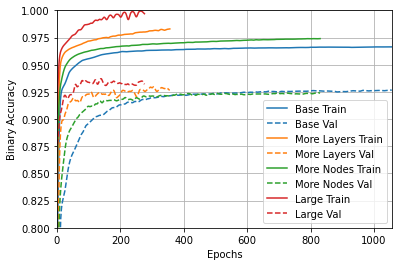

In [21]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_accuracy', smoothing_std=10)
plotter.plot(model_histories)
plt.ylim([.8, 1])

(0.0, 1.0)

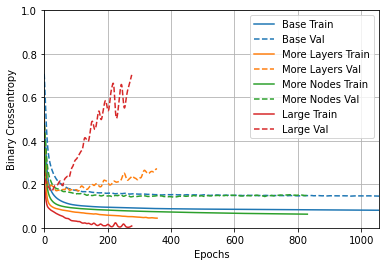

In [22]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(model_histories)
plt.ylim([0, 1])

In [23]:
#Next We will adjust for overfitting
from tensorflow.keras import regularizers
reg_histories={}
reg_histories['Large'] = model_histories['Large']

In [24]:
#"L2 regularization will penalize the weights parameters without making them sparse 
#since the penalty goes to zero for small weights."
#create larger architecture + More layers & More Nodes
l2 = tf.keras.Sequential([
    layers.Dense(66, activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=[len(X_train_tf[0])]),
    layers.Dense(66, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(66, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(66, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(66, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

reg_histories['L2 Reg'] = compile_and_fit(l2, 'L2 Reg')


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 66)                1518      
_________________________________________________________________
dense_17 (Dense)             (None, 66)                4422      
_________________________________________________________________
dense_18 (Dense)             (None, 66)                4422      
_________________________________________________________________
dense_19 (Dense)             (None, 66)                4422      
_________________________________________________________________
dense_20 (Dense)             (None, 66)                4422      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 67        
Total params: 19,273
Trainable params: 19,273
Non-trainable params: 0
__________________________________________________

In [25]:
#"The intuitive explanation for dropout is that because individual nodes in the 
#network cannot rely on the output of the others, each node must output 
#features that are useful on their own."

do = tf.keras.Sequential([
    layers.Dense(66, activation='relu', input_shape=[len(X_train_tf[0])]),
    layers.Dropout(0.5),
    layers.Dense(66, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(66, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(66, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(66, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

reg_histories['Drop Out'] = compile_and_fit(do, 'Drop Out')


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 66)                1518      
_________________________________________________________________
dropout (Dropout)            (None, 66)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 66)                4422      
_________________________________________________________________
dropout_1 (Dropout)          (None, 66)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 66)                4422      
_________________________________________________________________
dropout_2 (Dropout)          (None, 66)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 66)               

In [26]:
#Combine Both L2 and DropOut Techiniques

combo = tf.keras.Sequential([
    layers.Dense(66, activation='relu',kernel_regularizer=regularizers.l2(0.001), input_shape=[len(X_train_tf[0])]),
    layers.Dropout(0.5),
    layers.Dense(66, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(66, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(66, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(66, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1)
])

reg_histories['Combo Reg'] = compile_and_fit(combo, 'Combo Out')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 66)                1518      
_________________________________________________________________
dropout_5 (Dropout)          (None, 66)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 66)                4422      
_________________________________________________________________
dropout_6 (Dropout)          (None, 66)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 66)                4422      
_________________________________________________________________
dropout_7 (Dropout)          (None, 66)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 66)               

(0.8, 1.0)

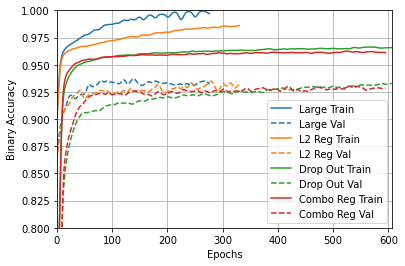

In [27]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_accuracy', smoothing_std=10)
plotter.plot(reg_histories)
plt.ylim([.8, 1])

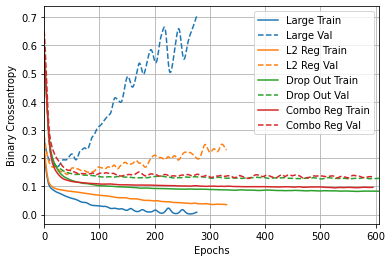

In [28]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(reg_histories)
#plt.ylim([0, 1])

In [29]:
# Model config
#model.get_config()


In [30]:
#Compile the model
#model.compile(optimizer=tf.optimizers.Adam(), 
#              loss='mse',
#              metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.BinaryAccuracy()]
              #metrics=[tf.keras.metrics.BinaryAccuracy(),'mae', 'mse']
#             )



In [31]:
_,_,acc_base = base_model.evaluate(X_test_tf, y_test,verbose=1)
_,_,acc_large = large.evaluate(X_test_tf, y_test,verbose=1)
_,_,acc_combo = combo.evaluate(X_test_tf, y_test,verbose=1)


14472/14472 [==============================] - 7s 507us/step - loss: 1.7638 - binary_crossentropy: 1.7424 - binary_accuracy: 0.6815


In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

def print_auc(X,y_actual, model):   
    y_test_preds = model.predict(X)
    auc = roc_auc_score(y_actual, y_test_preds)
    print('AUC:{:.3f}'.format(auc))
    return auc 

In [33]:
auc_base = print_auc(X_test_tf, y_test, base_model)
auc_large = print_auc(X_test_tf, y_test, large)
auc_combo = print_auc(X_test_tf, y_test, combo)

AUC:0.932
AUC:0.918
AUC:0.935


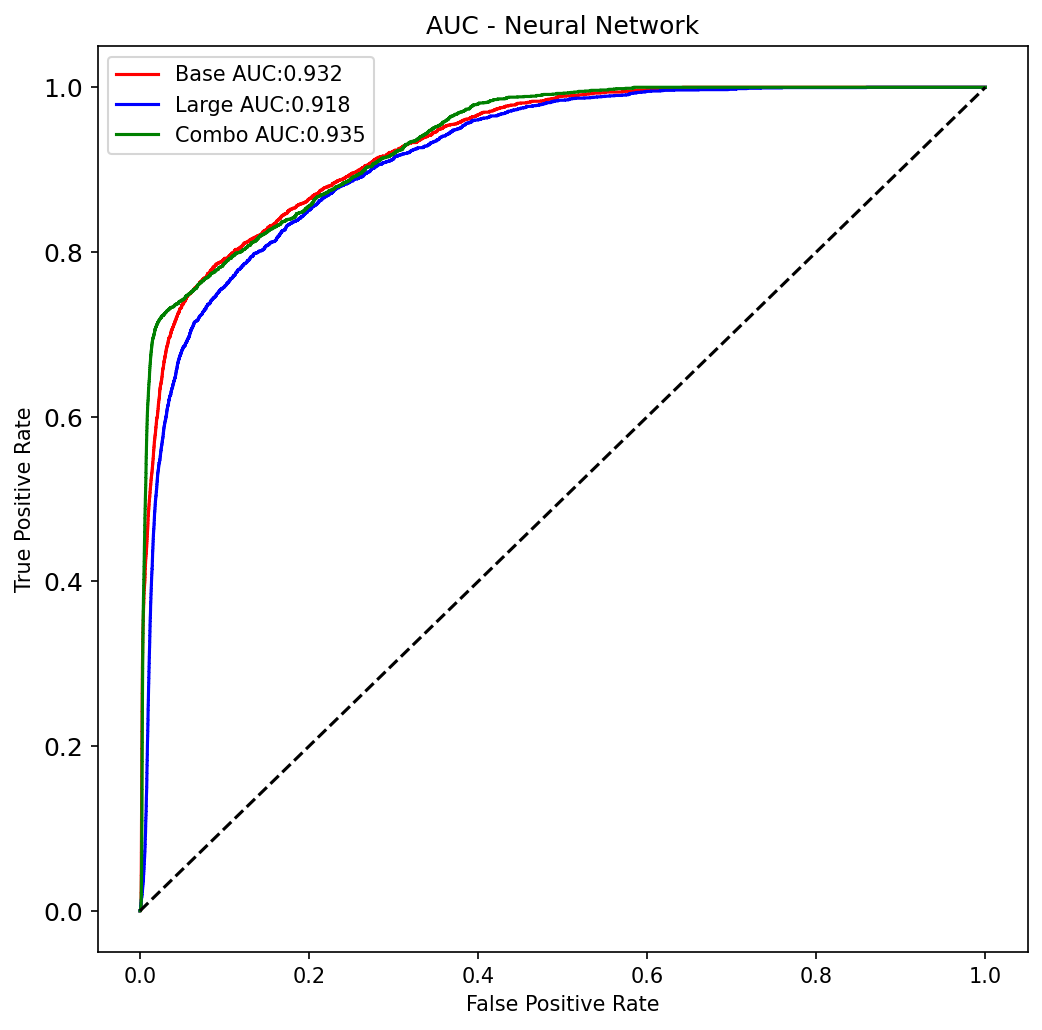

In [34]:
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, base_model.predict(X_test_tf))
fpr_large, tpr_large, thresholds_large = roc_curve(y_test, large.predict(X_test_tf))
fpr_combo, tpr_combo, thresholds_combo = roc_curve(y_test, combo.predict(X_test_tf))

plt.figure(figsize=(8,8), dpi=150)
plt.rc('ytick', labelsize=12) 
plt.plot(fpr_base, tpr_base, 'r-',label ='Base AUC:{:.3f}'.format(auc_base))
plt.plot(fpr_large, tpr_large, 'b-',label ='Large AUC:{:.3f}'.format(auc_large))
plt.plot(fpr_combo, tpr_combo, 'g-',label ='Combo AUC:{:.3f}'.format(auc_combo))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC - Neural Network')
plt.legend()
plt.show()